In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/SPY/SPY_1min_results_df.csv", index_col=False)
df = df.iloc[:, 2:]
df

,Risk,Reward,Win Rate (%),Cumulative Returns,Sortino Ratio,Average Profit per Winning Trade (%),Average Loss per Losing Trade (%),Average Return (%),Trade Frequency (Trades per Day),Downside Deviation,Volatility (Standard Deviation of Algo Returns),Gross Profit (%),Gross Loss (%),Total Number of Winning Trades,Total Number of Trades,Risk:Reward Ratio,Profit Factor
0,1,1,47.789219,0.967714,-0.986355,0.041629,-0.041890,-0.001977,27.983051,0.020297,0.000466,32.845408,-36.109289,789,1651,1.000000,0.909611
1,2,1,64.864865,0.978881,-0.427725,0.050785,-0.101484,-0.002715,13.169492,0.046822,0.000800,25.595454,-27.705087,504,777,0.500000,0.923854
2,3,1,72.471910,0.974999,-0.276538,0.054958,-0.161703,-0.004685,9.050847,0.072492,0.001064,21.268717,-23.770358,387,534,0.333333,0.894758
3,4,1,79.138322,0.975755,-0.180675,0.054927,-0.234635,-0.005481,7.474576,0.110999,0.001300,19.169425,-21.586421,349,441,0.250000,0.888032
4,5,1,81.250000,0.972349,-0.131971,0.051303,-0.264259,-0.007865,5.966102,0.152144,0.001420,14.672616,-17.441077,286,352,0.200000,0.841268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,10,48.936170,1.056489,-0.103061,0.309882,-0.181310,0.059060,1.678571,0.188328,0.003444,14.254559,-8.702888,46,94,1.666667,1.637911
96,7,10,52.000000,1.042842,-0.081700,0.347597,-0.258279,0.056776,1.339286,0.237849,0.004101,13.556268,-9.298048,39,75,1.428571,1.457969
97,8,10,49.333333,1.034286,-0.094823,0.354166,-0.254427,0.045812,1.315789,0.206088,0.004166,13.104155,-9.668233,37,75,1.250000,1.355383
98,9,10,50.000000,1.013062,-0.058112,0.356747,-0.311234,0.022756,1.052632,0.340248,0.004783,10.702406,-9.337024,30,60,1.111111,1.146233


In [2]:
# Reshape the data for the heatmap
df = df[["Risk", "Reward", "Total Number of Trades"]]
df = df.pivot(index="Risk", columns="Reward", values="Total Number of Trades")
df

Reward,1,2,3,4,5,6,7,8,9,10
Risk,,,,,,,,,,
1,1651,1928,732,315,309,237,220,201,170,140
2,777,383,272,161,125,147,160,114,127,146
3,534,265,211,132,128,141,110,95,109,81
4,441,240,170,151,146,185,129,118,93,87
5,352,223,152,156,143,134,113,117,98,91
6,471,225,173,154,150,132,109,105,92,94
7,450,271,180,178,168,140,114,96,93,75
8,492,279,175,165,143,155,108,99,87,75
9,594,247,169,136,125,135,107,79,74,60


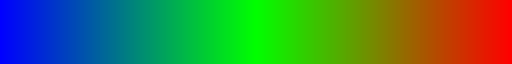

In [3]:
# Create a custom colormap (blue to green to red)
colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]  # Blue, Green, Red
cmap = sns.blend_palette(colors, as_cmap=True)
cmap

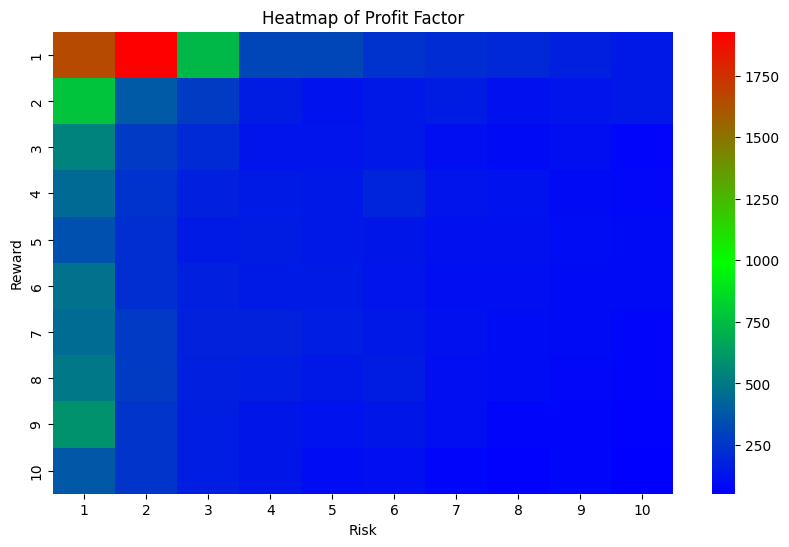

In [4]:
# Create the heatmap with custom colormap (blue to green to red)
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap=cmap, cbar=True)
plt.xlabel('Risk')
plt.ylabel('Reward')
plt.title('Heatmap of Profit Factor')
plt.show()